# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chefd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv(dotenv_path="C:/Users/chefd/OneDrive/Desktop/keys/.env.txt")

True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
Bit_Art = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100, # the number of results to return per page
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {Bit_Art['totalResults']}")



Total articles about Bitcoin: 7765


In [5]:
# Fetch the Ethereum news articles
Eth_Art = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100, # the number of results to return per page
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {Eth_Art ['totalResults']}")

Total articles about Ethereum: 4914


In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bit_Art["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000
2,2022-07-25,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835
3,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
4,2022-07-21,Elon Musk-owned electric vehicle making compan...,0.2023,0.053,0.000,0.947


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Eth_Art["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
1,2022-08-04,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901
2,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827
3,2022-07-23,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955
4,2022-07-25,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.047574,0.065810,0.053070,0.88110
std,0.455208,0.071569,0.072859,0.09011
min,-0.908100,0.000000,0.000000,0.62800
25%,-0.301550,0.000000,0.000000,0.82525
50%,0.000000,0.056000,0.000000,0.88500
75%,0.362050,0.110500,0.102250,0.94900
max,0.924600,0.372000,0.307000,1.00000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.135886,0.073260,0.042580,0.884180
std,0.450018,0.071653,0.067228,0.086174
min,-0.936600,0.000000,0.000000,0.646000
25%,-0.038650,0.000000,0.000000,0.823500
50%,0.140550,0.061000,0.000000,0.892500
75%,0.510600,0.118250,0.057000,0.943750
max,0.921600,0.299000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive with  score of 0.071930

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compund score of 0.924600

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score of 0.372000	

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary

sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chefd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    
    # Remove the stop words
    
    
    return tokens


In [13]:
# Create a new tokens column for Bitcoin
Bitcoin_df['tokens'] = Bitcoin_df['text'].apply(tokenizer)
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881,"[morning, june, bill, stewart, ceo, mainebased..."
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000,"[tools, trace, cryptocurrencies, last, several..."
2,2022-07-25,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835,"[got, ta, hand, people, impetuous, even, face,..."
3,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
4,2022-07-21,Elon Musk-owned electric vehicle making compan...,0.2023,0.053,0.000,0.947,"[elon, muskowned, electric, vehicle, making, c..."


In [14]:
# Create a new tokens column for Ethereum
Ethereum_df['tokens'] = Ethereum_df['text'].apply(tokenizer)
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
1,2022-08-04,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901,"[nonfungible, token, nft, market, fallen, clif..."
2,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827,"[day, ending, letter, inevitably, means, there..."
3,2022-07-23,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955,"[less, two, weeks, soft, launch, gamestops, nf..."
4,2022-07-25,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952,"[ethereum, merge, significant, people, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
Bit_ngram = Bitcoin_df['text'].str.cat()
process_B = tokenizer(Bit_ngram)
bigram_counts_B = Counter(ngrams(process_B, n=2))


In [17]:
# Generate the Ethereum N-grams where N=2
Eth_ngram = Ethereum_df['text'].str.cat()
process_E = tokenizer(Eth_ngram)
bigram_counts_E = Counter(ngrams(process_E, n=2))


In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
Bitcoin_words = token_count(bigram_counts_B, 10)
Bitcoin_words

[(('aug', 'reuters'), 10),
 (('charsjuly', 'reuters'), 7),
 (('charsaug', 'reuters'), 6),
 (('july', 'reuters'), 6),
 (('hard', 'drive'), 5),
 (('bitcoin', 'holdings'), 5),
 (('bitcoin', 'mining'), 4),
 (('worlds', 'biggest'), 4),
 (('second', 'quarter'), 4),
 (('charsnew', 'york'), 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
Ethereum_words = token_count(bigram_counts_E, 10)
Ethereum_words

[(('aug', 'reuters'), 5),
 (('ethereum', 'blockchain'), 4),
 (('cryptocurrency', 'market'), 4),
 (('consensus', 'mechanism'), 4),
 (('federal', 'reserve'), 4),
 (('crypto', 'market'), 4),
 (('securities', 'exchange'), 3),
 (('exchange', 'commission'), 3),
 (('called', 'falling'), 3),
 (('falling', 'man'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

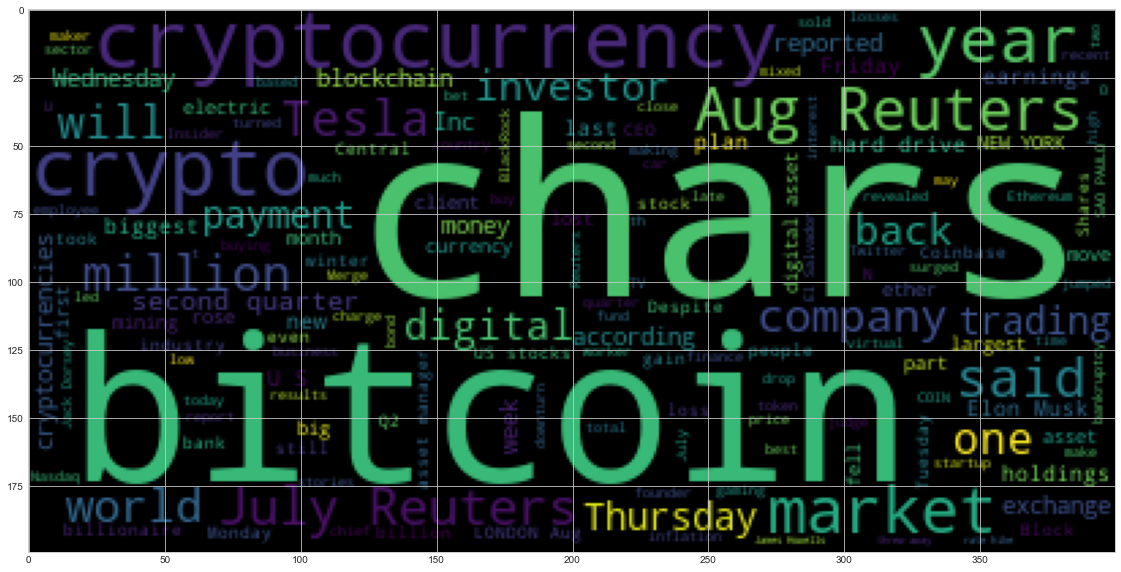

In [22]:
# Generate the Bitcoin word cloud

wc = WordCloud().generate(Bit_ngram)
plt.imshow(wc)


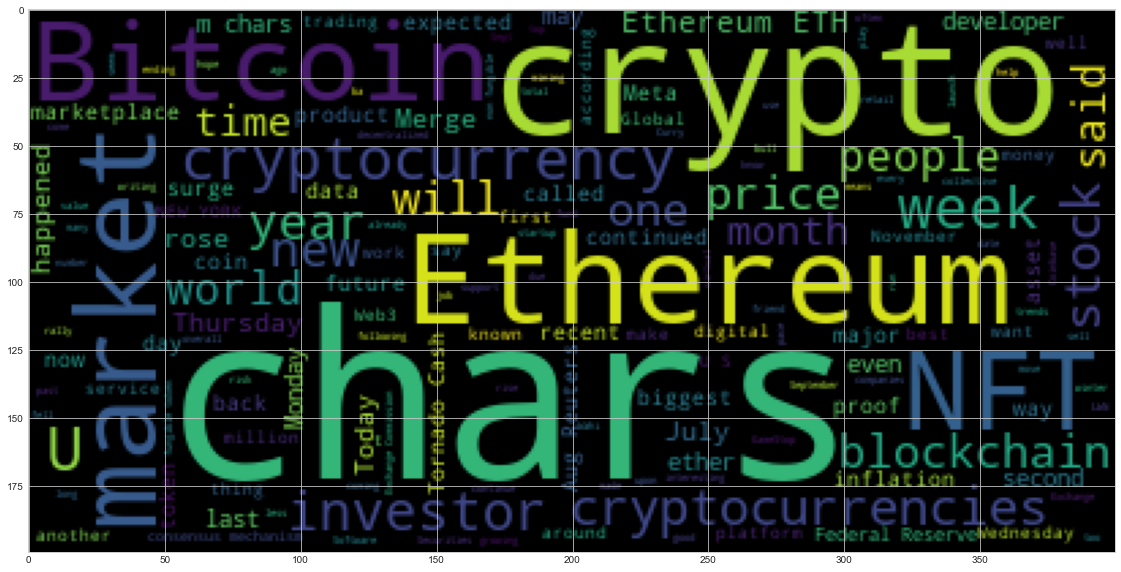

In [23]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(Eth_ngram)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
nlp = spacy.load("en_core_web_sm")

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
Bit_con = (Bit_ngram)

In [47]:
# Run the NER processor on all of the text
doc = nlp(Bit_con)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [48]:
# Render the visualization
displacy.render(doc, style='ent')


In [ ]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
Eth_con = (Eth_ngram)

In [49]:
# Run the NER processor on all of the text
doc_E = nlp(Eth_con)

# Add a title to the document
doc_E.user_data["title"] = "ETHEREUM NER"

In [50]:
# Render the visualization
displacy.render(doc_E, style='ent')

In [51]:
# List all Entities
print([ent.text for ent in doc_E.ents if ent.label_ == 'GPE'])

['Belgium', 'Paris', 'New York', 'U.S.', 'Bloomberg', 'chars]NEW YORK', 'U.S.', 'US', 'Sepolia', 'Toms Hardware', '+1773', 'US', 'Manhattan', 'Los Angeles', 'Santa Monica', 'U.S.', 'chars]NEW YORK', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'Ethereu', 'Francophone Africa', 'Douala', 'U.S.']


---